# Advanced Regression Assignment

### Objective

The objective is to build a machine learnig model to predict the house prices based on the independent features

### Business Goal

This model will be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market

### Building Multiple Linear Regression Model


#### Reading and Understanding Data

In [376]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [276]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [277]:
#read the data to dataframe
h_sales = pd.read_csv('train.csv')

In [278]:
#analyzing the dimension of the dataset
h_sales.shape

(1460, 81)

In [279]:
#checking for the columns and other details of the dataset
h_sales.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [280]:
h_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [281]:
h_sales.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [282]:
missing=round(100*(h_sales.isnull().sum()/len(h_sales.Id)), 2)
missing.loc[missing>0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

Since, the null percentgae of Alley,PoolQc,MiscFeature >80%, we shall check for its information content

In [283]:
#check for Alley
h_sales['Alley'].fillna('NA',inplace=True)  #filling none values as this NA is a categortical NA

In [284]:
round(100*(h_sales['Alley'].value_counts()/len(h_sales['Alley'])),2)

NA      93.77
Grvl     3.42
Pave     2.81
Name: Alley, dtype: float64

Here in Alley the NA represents the NO Alley Cateegory with such big %, and hence this does not have a big impact so we can drop this

In [285]:
#check for MiscFeature
h_sales['MiscFeature'].fillna('None',inplace=True)#filling none values as this NA is a categortical NA

In [286]:
round(100*(h_sales['MiscFeature'].value_counts()/len(h_sales['MiscFeature'])),2)

None    96.30
Shed     3.36
Gar2     0.14
Othr     0.14
TenC     0.07
Name: MiscFeature, dtype: float64

In [287]:
#check for Fence
h_sales['Fence'].fillna('NA',inplace=True)#filling none values as this NA is a categortical NA

In [288]:
round(100*(h_sales['Fence'].value_counts()/len(h_sales['Fence'])),2)

NA       80.75
MnPrv    10.75
GdPrv     4.04
GdWo      3.70
MnWw      0.75
Name: Fence, dtype: float64

Approximately 81% of the houses donot have any fence and the cateofry is NA, so we can drop this as well 

In [289]:
#check for poolqc
h_sales['PoolQC'].fillna('NA',inplace=True)#filling none values as this NA is a categortical NA

In [290]:
round(100*(h_sales['PoolQC'].value_counts()/len(h_sales['PoolQC'])),2)

NA    99.52
Gd     0.21
Fa     0.14
Ex     0.14
Name: PoolQC, dtype: float64

Approximately 99.5% of the houses donot have pools which is a big number and hence this feature can't be used for the analysis as this would not be significant for the analysis like Alley and MiscFeature

Dropping these 3 columns from the dataset:
- Alley
- MiscFeature
- PoolQC

In [291]:
h_sales.drop(['Alley','MiscFeature','PoolQC'],axis=1,inplace=True)

In [292]:
h_sales.shape

(1460, 78)

In [293]:
#dropping the ID column from the dataset

In [294]:
h_sales.drop(['Id'],axis=1,inplace=True)

In [295]:
h_sales.drop(['Fence'],axis=1,inplace=True)

In [296]:
h_sales.shape

(1460, 76)

In [297]:
## Deleting those two values with outliers. 
h_sales = h_sales[h_sales.GrLivArea < 4500]

In [298]:
h_sales.shape

(1458, 76)

The target varibale in our dataset is the SalesPrice
Let's analyze the numerical variables and the categorical variables correlation with the target variable for further data analysis
Currently we have 75 featurees in the dataset excluidng our target variable=SalesPrice

#### Note - As we go ahead with the segregation of the numerical and categorical variables in a separate df, we are still focusing on the main Df h_sales and hence the operations perfromed on these numerical and categorical dfs are just for reference and analysis

In [299]:
#listing out the numerical variable together first
#using select_dtypes function to group the numerical varibales together
num_var = h_sales.select_dtypes(exclude=['object'])
num_var.shape

(1458, 37)

Now, we have 37 numerical variables to find their correlation with the target variable

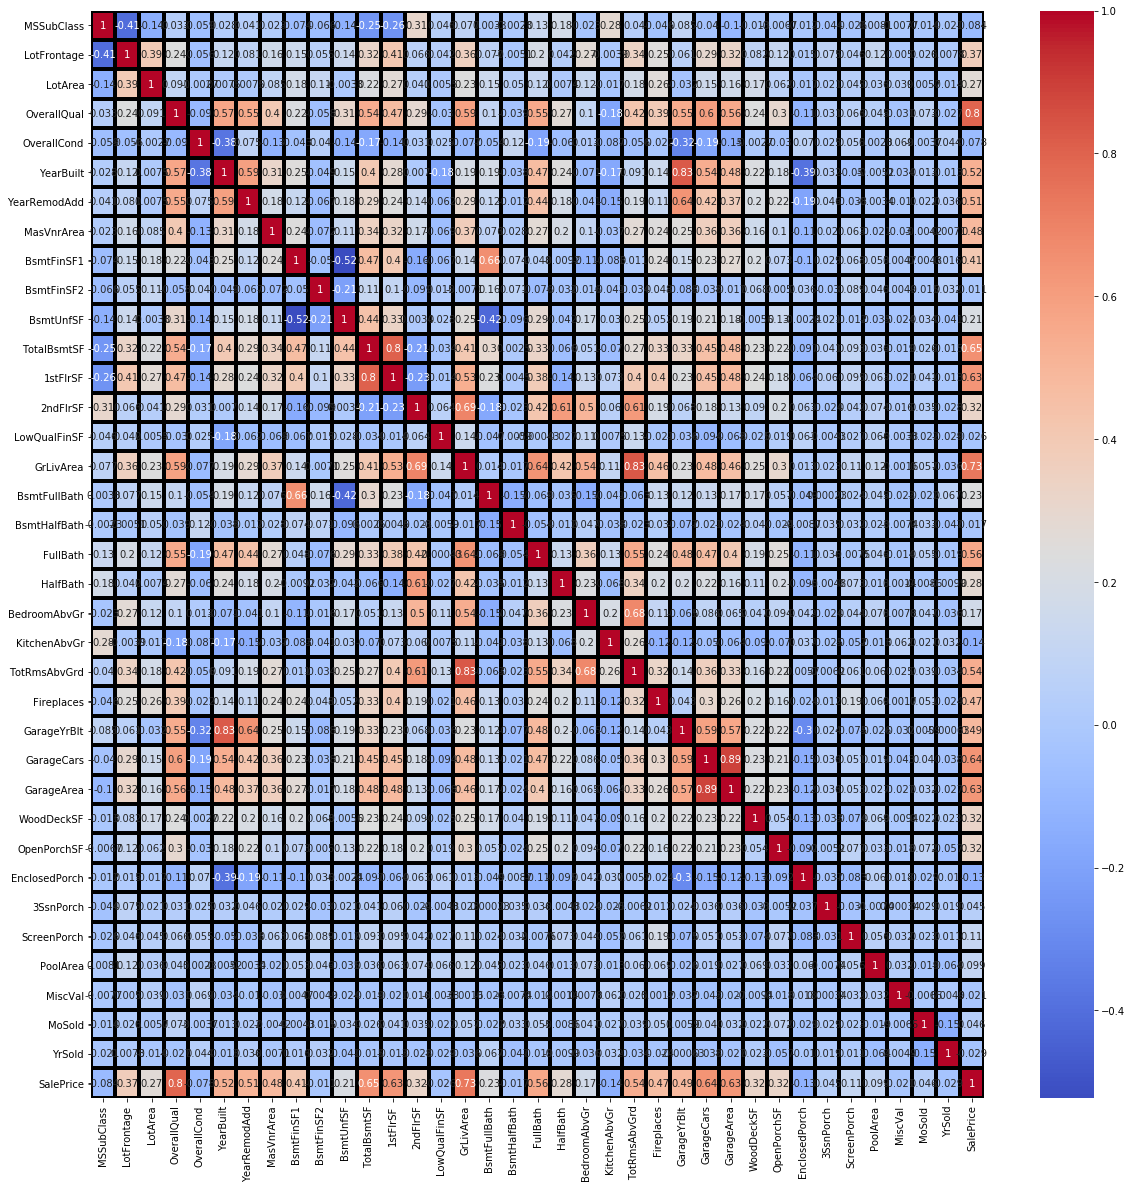

In [300]:
plt.figure(figsize=(20,20))

corr = num_var.corr()
sns.heatmap(corr, annot=True,cmap='coolwarm',linewidths=3, linecolor='black')


- From this heatmap we can see theis is a high correlation of 83% between Garage built year and the house built year, so we can just drop the GarageYrBlt column
- 88% correlation between GarageCars and GarageArea
- 83% correlation between GrLivArea and TotRmsAbvGrd
- 82% correlation between 1stFlrSF and TotalBsmtSF
- OverallQual is 79% correlated with our target variables

In [301]:
h_sales.drop(['GarageYrBlt'],axis=1,inplace=True)

In [302]:
print(h_sales.shape)
num_var.drop(['GarageYrBlt'],axis=1,inplace=True)
print(num_var.shape)

(1458, 75)
(1458, 36)


Now, lets treat the other numerical values,null value count and percentage already checked above..let's fill the null values for the required numerical variables

In [303]:
num_var.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

We see from above that LotFrontage only has the null values rest all are 0, let's see how to fill this column's missing value

In [304]:
h_sales['LotFrontage'].describe() # we can impute the missing values with median here in this case

count    1199.000000
mean       69.797331
std        23.203458
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [305]:
h_sales['LotFrontage'].fillna(69,inplace=True)
h_sales['LotFrontage'].isnull().sum()

0

In [306]:
num_var['LotFrontage'].fillna(69,inplace=True)
num_var.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1450.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.893004,69.655693,10459.936900,6.093964,5.576132,1971.218107,1984.834019,102.753793,438.827160,46.613169,...,94.084362,46.245542,21.984225,3.414266,15.081619,2.433471,43.548697,6.323045,2007.816187,180932.919067
std,42.329437,21.042480,9859.198156,1.376369,1.113359,30.193754,20.641760,179.442156,432.969094,161.420729,...,125.350021,65.312932,61.155666,29.337173,55.792877,38.209947,496.460799,2.700167,1.328826,79495.055285
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129925.000000
50%,50.000000,69.000000,9475.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,382.000000,0.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,164.750000,711.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Visualization for Numerical Variables

In [307]:
num_var.shape

(1458, 36)

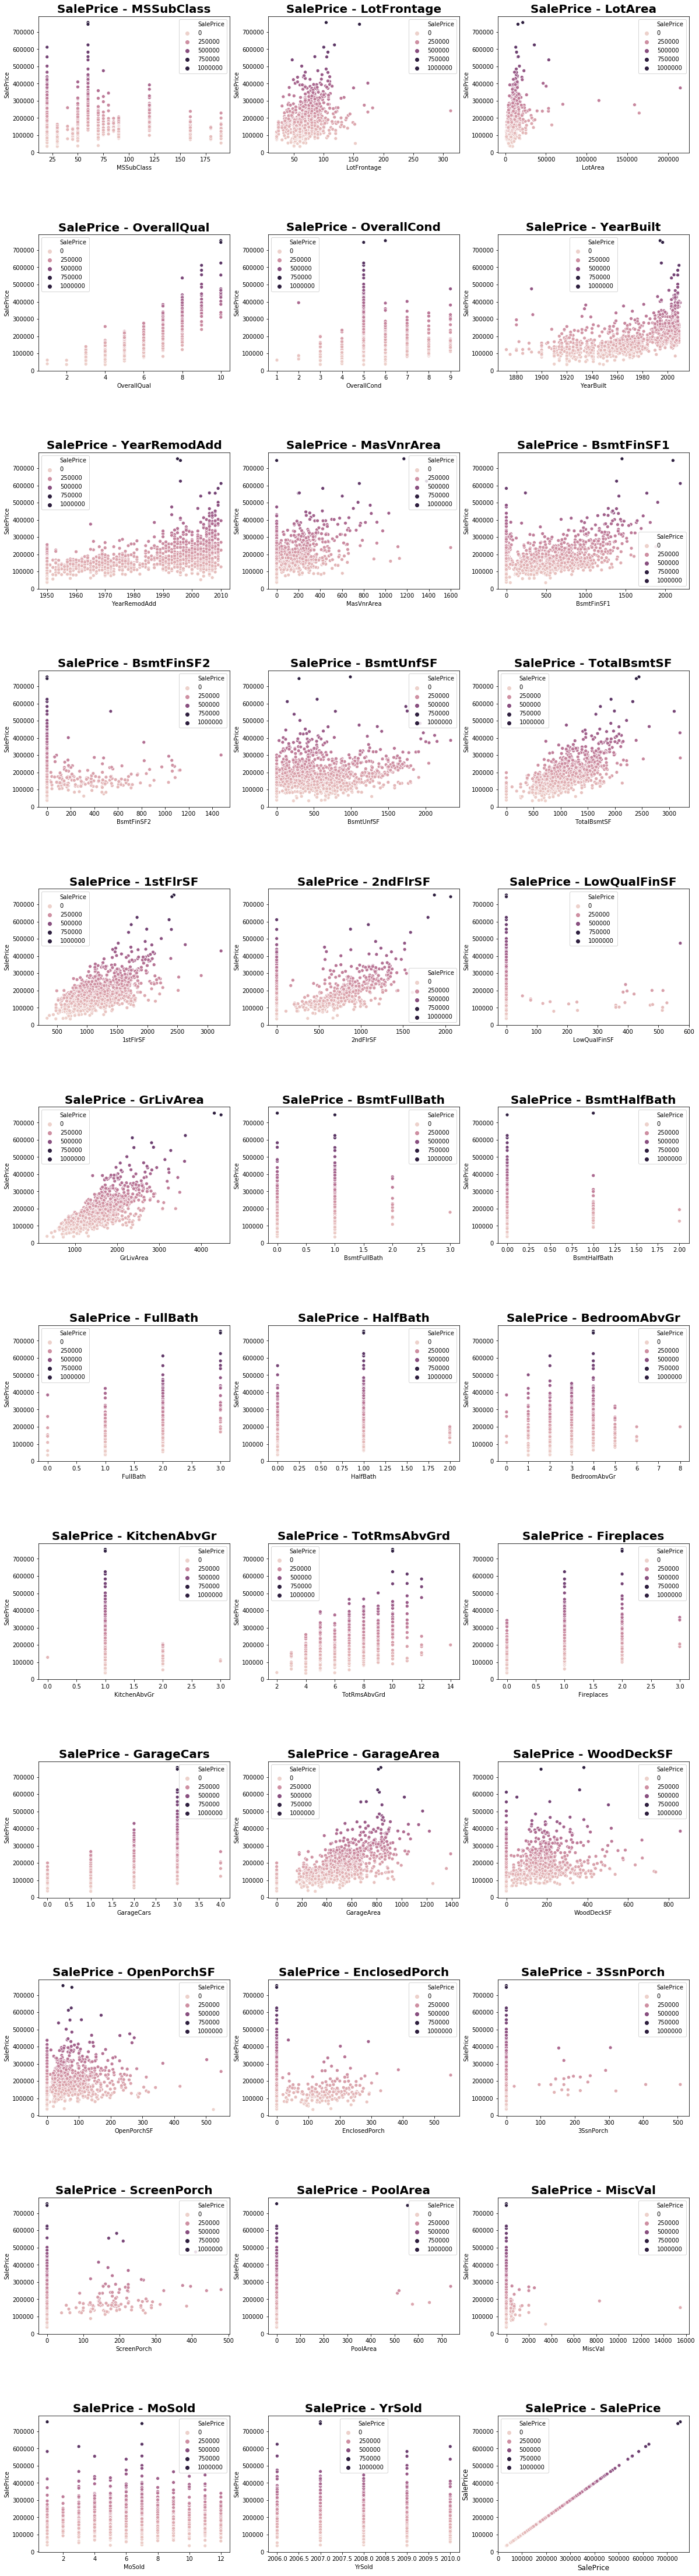

In [308]:
#numerical variables plotting with respect to the target variable=SalesPrice
fig,axs= plt.subplots(12,3,figsize=(20,80))
#adjust horizontal space between plots 
fig.subplots_adjust(hspace=0.6)
for i,ax in zip(num_var.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=num_var,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' - '+str(i),fontweight='bold',size=20)

#### The sales price increases with increase in overall house quality and the sales price also increased with the year built(as the house building depends on various factors like raw materials price..which generally increases with the time) 

### Data ANalysis for categorical variables

In [309]:
#listing out the categorical variable together first
#using select_dtypes function to group the categorical varibales together
cat_var = h_sales.select_dtypes(include=['object'])


In [310]:
cat_var.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

Treating the missing categorical variables, we can fill these variables with NA as we did for Alley,Fence etc.
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- FireplaceQu

In [311]:
h_sales['FireplaceQu'].fillna('None',inplace=True)
h_sales['FireplaceQu'].value_counts()

None    690
Gd      378
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [312]:
cat_var['FireplaceQu'].fillna('None',inplace=True)
cat_var['FireplaceQu'].value_counts()

None    690
Gd      378
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [313]:
h_sales['GarageCond'].fillna('None',inplace=True)
h_sales['GarageCond'].value_counts()

TA      1324
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

In [314]:
cat_var['GarageCond'].fillna('None',inplace=True)
cat_var['GarageCond'].value_counts()

TA      1324
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

In [315]:
h_sales['GarageType'].fillna('None',inplace=True)
h_sales['GarageType'].value_counts()

Attchd     869
Detchd     387
BuiltIn     87
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [316]:
cat_var['GarageType'].fillna('None',inplace=True)
cat_var['GarageType'].value_counts()

Attchd     869
Detchd     387
BuiltIn     87
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [317]:
h_sales['GarageQual'].fillna('None',inplace=True)
h_sales['GarageQual'].value_counts()

TA      1309
None      81
Fa        48
Gd        14
Po         3
Ex         3
Name: GarageQual, dtype: int64

In [318]:
cat_var['GarageQual'].fillna('None',inplace=True)
cat_var['GarageQual'].value_counts()

TA      1309
None      81
Fa        48
Gd        14
Po         3
Ex         3
Name: GarageQual, dtype: int64

In [319]:
h_sales['GarageFinish'].fillna('None',inplace=True)
h_sales['GarageFinish'].value_counts()

Unf     605
RFn     422
Fin     350
None     81
Name: GarageFinish, dtype: int64

In [320]:
cat_var['GarageFinish'].fillna('None',inplace=True)
cat_var['GarageFinish'].value_counts()

Unf     605
RFn     422
Fin     350
None     81
Name: GarageFinish, dtype: int64

In [321]:
h_sales['BsmtFinType1'].fillna('None',inplace=True)
h_sales['BsmtFinType1'].value_counts()

Unf     430
GLQ     416
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [322]:
cat_var['BsmtFinType1'].fillna('None',inplace=True)
cat_var['BsmtFinType1'].value_counts()

Unf     430
GLQ     416
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [323]:
h_sales['BsmtFinType2'].fillna('None',inplace=True)
h_sales['BsmtFinType2'].value_counts()

Unf     1254
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64

In [324]:
cat_var['BsmtFinType2'].fillna('None',inplace=True)
cat_var['BsmtFinType2'].value_counts()

Unf     1254
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64

In [325]:
h_sales['BsmtExposure'].fillna('None',inplace=True)
h_sales['BsmtExposure'].value_counts()

No      953
Av      221
Gd      132
Mn      114
None     38
Name: BsmtExposure, dtype: int64

In [326]:
cat_var['BsmtExposure'].fillna('None',inplace=True)
cat_var['BsmtExposure'].value_counts()

No      953
Av      221
Gd      132
Mn      114
None     38
Name: BsmtExposure, dtype: int64

In [327]:
h_sales['BsmtQual'].fillna('None',inplace=True)
h_sales['BsmtQual'].value_counts()

TA      649
Gd      618
Ex      119
None     37
Fa       35
Name: BsmtQual, dtype: int64

In [328]:
cat_var['BsmtQual'].fillna('None',inplace=True)
cat_var['BsmtQual'].value_counts()

TA      649
Gd      618
Ex      119
None     37
Fa       35
Name: BsmtQual, dtype: int64

In [329]:
h_sales['BsmtCond'].fillna('None',inplace=True)
h_sales['BsmtCond'].value_counts()

TA      1309
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64

In [330]:
cat_var['BsmtCond'].fillna('None',inplace=True)
cat_var['BsmtCond'].value_counts()

TA      1309
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64

### Data Visualization of Categorical Variables with Target Variable

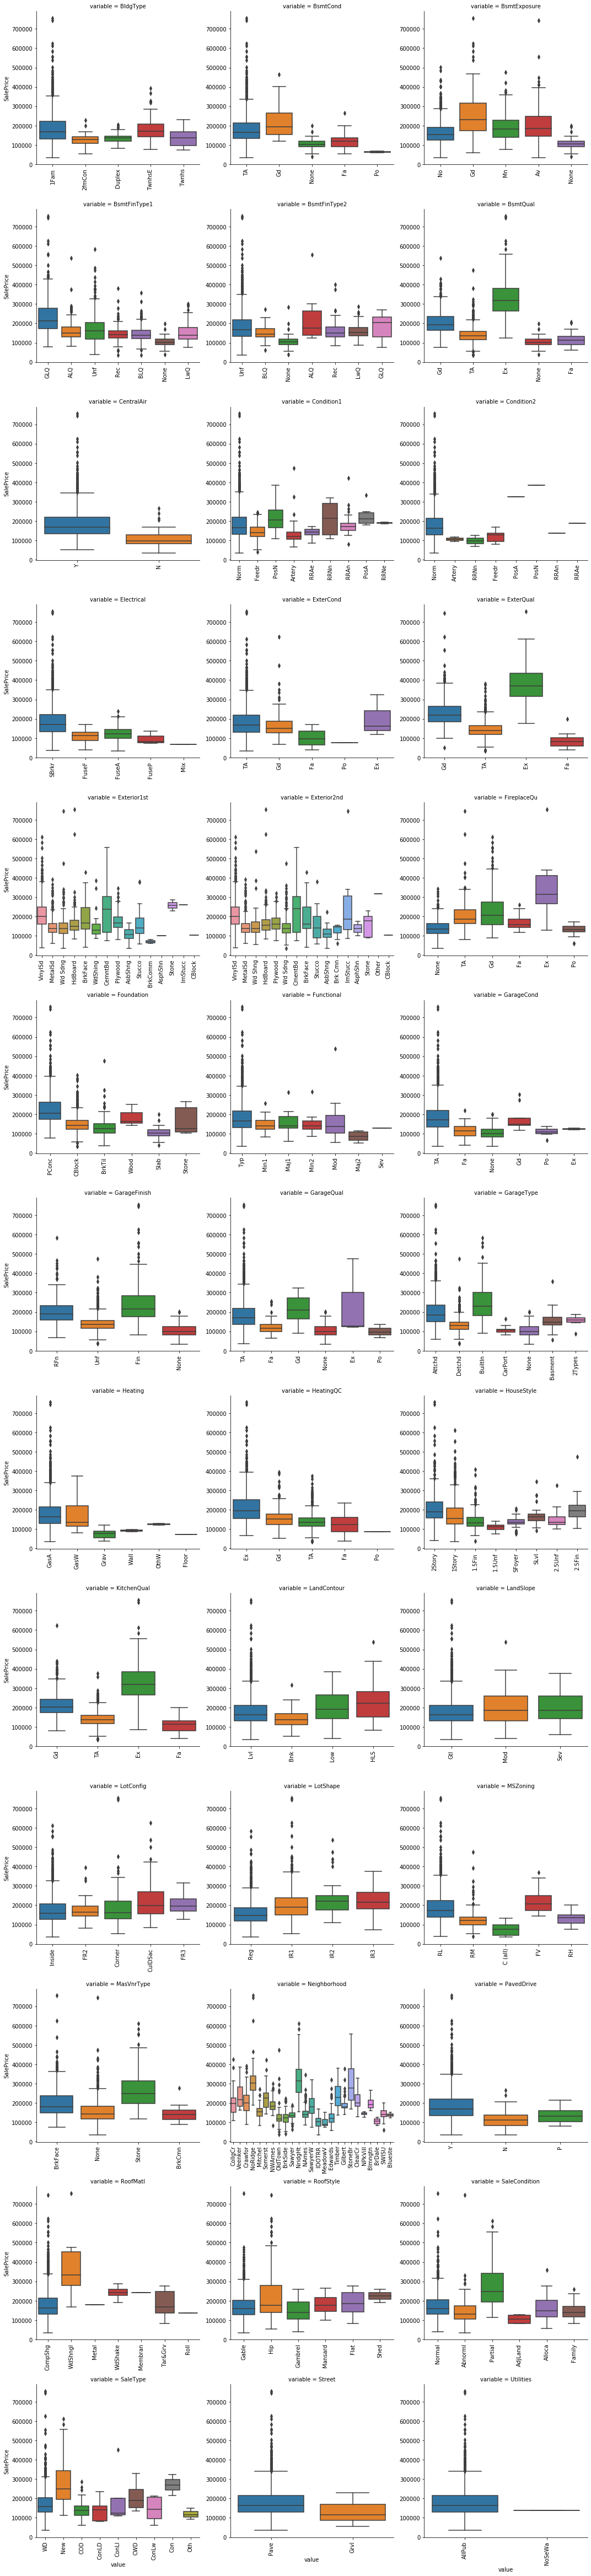

In [331]:
def f_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    

f = pd.melt(h_sales, id_vars=['SalePrice'], value_vars=sorted(cat_var.columns))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(f_boxplot, "value", "SalePrice")


Now, lets see the target variable -Sales PRice distribution

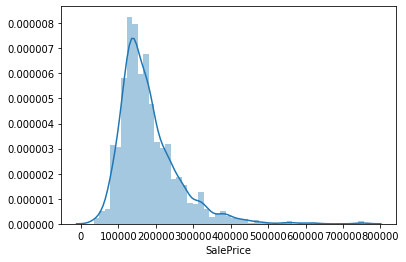

In [332]:
# Check distribution of target variable
sns.distplot(h_sales.SalePrice)

As we can see that this distirbution is not normal and is right skewed as the mean> median
To make this right skewed distribution normal, we can do the log transformation

In [334]:
# Transform the sales price 
h_sales['SalePrice']=np.log1p(h_sales['SalePrice'])


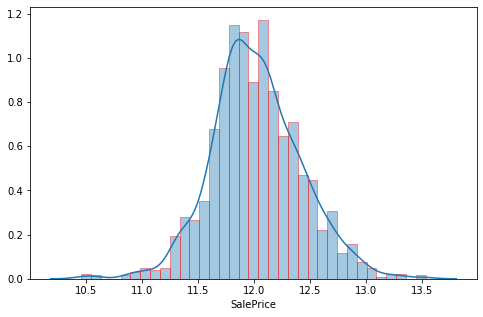

In [336]:
# Distribution of Target variable (SalePrice)
plt.figure(figsize=(8,5))
sns.distplot(h_sales['SalePrice'],hist_kws={"edgecolor": (1,0,0,1)})

NOw, as a part of data preparation we need to check for the presence of outliers

In [337]:
h_sales['GrLivArea'].describe()

count    1458.000000
mean     1510.465706
std       507.878508
min       334.000000
25%      1128.500000
50%      1461.500000
75%      1776.000000
max      4476.000000
Name: GrLivArea, dtype: float64

In [338]:
h_sales.shape

(1458, 75)

In [339]:
y=h_sales['SalePrice']
print(y.shape)
h_sales.drop('SalePrice',axis=1,inplace=True)

(1458,)


In [340]:
#will convert those columns into dummy variables later.
h_sales[['MSSubClass']] = h_sales[['MSSubClass']].astype(str) 
h_sales['YrSold'] = h_sales['YrSold'].astype(str)
h_sales['MoSold'] = h_sales['MoSold'].astype(str) 

NOw that we have the data prepared, outl;iers treated,missing values handled and data vsualized let's move on to the creation of derived variables

Before we create dervied variables, we can look at the variables which have same values throughout in the dataset like the pool qualtiy which was removed by us not considered as important

In [341]:
h_sales['Utilities'].value_counts()

AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64

In [342]:
h_sales['Street'].value_counts()

Pave    1452
Grvl       6
Name: Street, dtype: int64

In [343]:
#We can drop these two columns-Utilities and Street
h_sales.drop(['Street','Utilities'],axis=1,inplace=True)
cat_var.drop(['Street','Utilities'],axis=1,inplace=True)

In [344]:
h_sales.shape

(1458, 72)

In [345]:
#Total Area
h_sales['Total_Area'] = (h_sales['BsmtFinSF1'] + h_sales['BsmtFinSF2'] +
                                 h_sales['1stFlrSF'] + h_sales['2ndFlrSF'])


In [346]:
# total number of bathrooms
h_sales['Total_Bathrooms'] = (h_sales['FullBath'] + (0.5 * h_sales['HalfBath']) +
                               h_sales['BsmtFullBath'] + (0.5 * h_sales['BsmtHalfBath']))
#total porch area 
h_sales['Total_porch_sf'] = (h_sales['OpenPorchSF'] + h_sales['3SsnPorch'] + h_sales['EnclosedPorch'] + \
                              h_sales['ScreenPorch'] + h_sales['WoodDeckSF'])

In [347]:
h_sales.shape

(1458, 75)

In [348]:
missing=round(100*(h_sales.isnull().sum()/len(h_sales)), 2)
missing.loc[missing>0]

MasVnrType    0.55
MasVnrArea    0.55
Electrical    0.07
dtype: float64

In [349]:
h_sales['MasVnrArea'].fillna(102.753793,inplace=True)

In [350]:
h_sales['MasVnrType'].fillna('None',inplace=True)

In [351]:
h_sales['Electrical'].fillna('None',inplace=True)

#### Creating DUmmy Variables now

In [352]:

h_sales_dummy_cat_var= pd.get_dummies(cat_var)

In [353]:
h_sales=pd.concat([h_sales,h_sales_dummy_cat_var],axis=1)
#concatenating the dummy df abd the original df

In [354]:
h_sales= h_sales.drop(cat_var.columns,axis=1) #removing original categorical columns

In [355]:
h_sales.shape

(1458, 282)

In [356]:
X_train = h_sales[:len(h_sales)] 

#### Cross Validation

In [357]:
kfold= KFold(n_splits=11,random_state=42,shuffle=True) #kfold cross validation

In [358]:
#error computation
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#Assigning scoring paramter to 'neg_mean_squared_error' beacause 'mean_squared_error' is not 
# available inside cross_val_score method
def cv_rmse(model, X=X_train):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfold))
    return (rmse)

#### Splitting the data into train and test

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.3, random_state=42)

In [360]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1020, 282)
(1020,)
(438, 282)


In [361]:
y_train.head()

135     12.066816
1452    11.884496
1047    11.884496
692     12.721889
435     12.264346
Name: SalePrice, dtype: float64

In [362]:
y_train.astype(float)

135     12.066816
1452    11.884496
1047    11.884496
692     12.721889
435     12.264346
          ...    
1096    11.751950
1131    11.445727
1295    11.838633
861     11.786770
1127    12.464587
Name: SalePrice, Length: 1020, dtype: float64

### RIDGE (L2 regularization)

In [363]:
ridge=Ridge()
params= {'alpha': [5,8,10,10.1,10.2,10.3,10.35,10.36,11,12,15]}
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
grid_ridge=GridSearchCV(ridge, param_grid=params,cv=kfold,scoring='neg_mean_squared_error')


In [364]:
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=11, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [5, 8, 10, 10.1, 10.2, 10.3, 10.35, 10.36, 11,
                                   12, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [365]:
alpha = grid_ridge.best_params_
ridge_score = grid_ridge.best_score_
print("Best Alphha is:",alpha['alpha'],'with score:',ridge_score)


Best Alphha is: 15 with score: -0.013449534771624779


In [368]:
ridge_alpha=Ridge(alpha=alpha['alpha'])
ridge_alpha.fit(X_train,y_train)
y_pred_train=ridge_alpha.predict(X_train)
y_pred_test=ridge_alpha.predict(X_test)

print('RMSE train = ',rmsle(y_train,y_pred_train))
print('RMSE test = ',rmsle(y_test,y_pred_test))

RMSE train =  0.09604300970706013
RMSE test =  0.1167293451586637


Text(0, 0.5, 'y_pred_test')

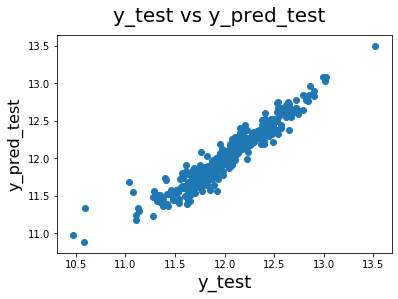

In [374]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16) 

### Lasso Regularization

In [370]:
from sklearn.pipeline import make_pipeline

In [373]:
scores={}
alphas_lasso = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008] #Best value of alpha parmaters for lasso
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=alphas_lasso, cv=kfold))
score = cv_rmse(lasso)
print(score)
print("lasso RMSE: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lasso'] = (score.mean(), score.std()) #Printing standard deviation to check deviation of scores

[0.08632293 0.1360321  0.09900142 0.12121709 0.12498837 0.10886999
 0.1428732  0.09987998 0.10029023 0.10661001 0.09077802]
lasso RMSE: 0.1106 (0.0175)


Text(0, 0.5, 'y_pred_test')

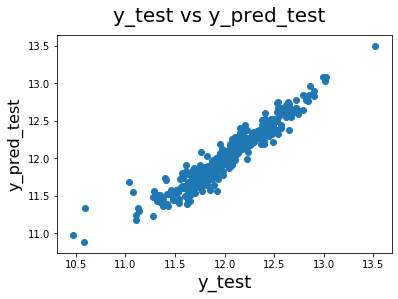

In [375]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16) 

The top features responsible for house price prediction are GrLivArea,OverQual,Year Built etc